<a id=contents></a>

# Exploring differences in salary between Data Scientists, Analysts and Machine Learning Engineers



[1. Exploratory data analysis](#one)

[2. Selecting a statistical test](#stat)

[3. Summary of findings](#conc)

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly_express as px

%matplotlib inline
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

import functions as fn

%load_ext autoreload
%autoreload 2

<a id=one ><a/> 

# 1. EDA 
    
[LINK to table of contents](#contents)

Please note that this data is "from the wild" - it was webscraped in a period between March and June of 2020 with 3 separate searches. The number of jobs varies between the 3 categories, naturally, and there are several key assumptions in our data collection that we must take note of:

1. Data posts off indeed.co.uk in this period are representative of the respective jobs across the London market;
2. The posts were scraped in the order that they came up in the search (which was ordered by decreasing 'relevance', where the relevance was decided by the website indeed.co.uk) - we're assuming that the most pertinent posts came up first
**3. Searches for one category invariably brings up results for another in the mix: if I search "data scientist", amongst the searches I will get results for "analyst" and "MLEng" jobs as well. This is a crucial point to note that there categories overlap - that is not to say there are duplicates, as these were removed. If we wanted to be more strict in our search we could use regex to trim the categories via job title using regex. However, I have reasoned that the reason for the results coming up mixed is more a reflection of the blurry lines between the roles. Thus, if we go forward with the assumption that whenever we are referring to a "DS" job, we are actually referring to a "searched for DS" job, then we retain a crucial detail. After all, if this information is to be useful for job searchers, we're trying to compare whether a job searcher should directly type in "data scientist" or "data analyst" or "machine learning engineer". From that perpective, our investigation remains valid.**

Notes on preprocessing: In a previous notebook (4b_Data_preprocessing.ipynb) I had done the following:
* extracted salary and salary ranges via regex from the description of the job
* where a range was given, I averaged
* with multiple intervals given for salary, I produced an additional column, where salary was stated per hour
* there is also an additional column stating what time interval was  given (e.g. Y - year; w - week), in case you'd want to use different sections of the data.

In [5]:
# load our data
df = pd.read_csv('clean_data/salary_data.csv', index_col=0)

How many jobs actually advertise their salary? If our data is representative, then this is not a pretty sight:


In [18]:
df.searched__data_analyst.value_counts()[1]

986

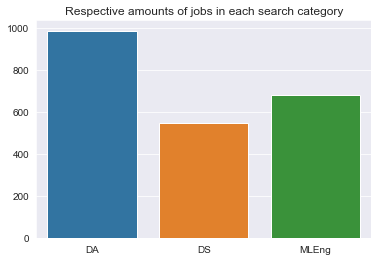

In [22]:
sns.barplot(x = ['DA', 'DS', 'MLEng'], 
            y = [df.searched__data_analyst.value_counts()[1],
                 df.searched__data_scientist.value_counts()[1],
                 df.searched__machine_learning_engineer.value_counts()[1]]);
plt.title('Respective amounts of jobs in each search category');

In [6]:
print('The percentage of jobs in our sample that openly state any kind of salary range is {}'.format(round(100* len(df.loc[~df.salary_from_page_source_as_stated.isna()])/len(df),2)))

The percentage of jobs in our sample that openly state any kind of salary range is 38.31


In [8]:
print('The absolute nr of DS jobs in our sample that openly state any kind of salary range is     {}'.format((len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__data_scientist==1]))))
print('The absolute nr of DA jobs in our sample that openly state any kind of salary range is     {}'.format((len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__data_analyst==1]))))
print('The absolute nr of ML Eng jobs in our sample that openly state any kind of salary range is {}'.format(len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__machine_learning_engineer==1])))

The absolute nr of DS jobs in our sample that openly state any kind of salary range is     202
The absolute nr of DA jobs in our sample that openly state any kind of salary range is     426
The absolute nr of ML Eng jobs in our sample that openly state any kind of salary range is 219


In [9]:
print('The percentage of DS jobs in our sample that openly state any kind of salary range is     {}'.format(round(100* len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__data_scientist==1])/len(df.loc[df.searched__data_scientist==1]),2)))
print('The percentage of DA jobs in our sample that openly state any kind of salary range is     {}'.format(round(100* len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__data_analyst==1])/len(df.loc[df.searched__data_analyst==1]),2)))
print('The percentage of ML Eng jobs in our sample that openly state any kind of salary range is {}'.format(round(100* len(df.loc[~df.salary_from_page_source_as_stated.isna() & df.searched__machine_learning_engineer==1])/len(df.loc[df.searched__machine_learning_engineer==1]),2)))

The percentage of DS jobs in our sample that openly state any kind of salary range is     37.06
The percentage of DA jobs in our sample that openly state any kind of salary range is     43.2
The percentage of ML Eng jobs in our sample that openly state any kind of salary range is 32.21


In [27]:
df.salary_from_page_source_time_period.value_counts(True)

Y    0.858156
D    0.111111
W    0.020095
H    0.008274
M    0.002364
Name: salary_from_page_source_time_period, dtype: float64

In [23]:
df.loc[df.searched__data_scientist==1].salary_from_page_source_time_period.value_counts(True)

Y    0.900990
D    0.059406
W    0.024752
H    0.009901
M    0.004950
Name: salary_from_page_source_time_period, dtype: float64

In [28]:
df.loc[df.searched__data_analyst==1].salary_from_page_source_time_period.value_counts(True)

Y    0.807512
D    0.161972
W    0.016432
H    0.011737
M    0.002347
Name: salary_from_page_source_time_period, dtype: float64

In [29]:
df.loc[df.searched__machine_learning_engineer==1].salary_from_page_source_time_period.value_counts(True)

Y    0.917431
D    0.059633
W    0.022936
Name: salary_from_page_source_time_period, dtype: float64

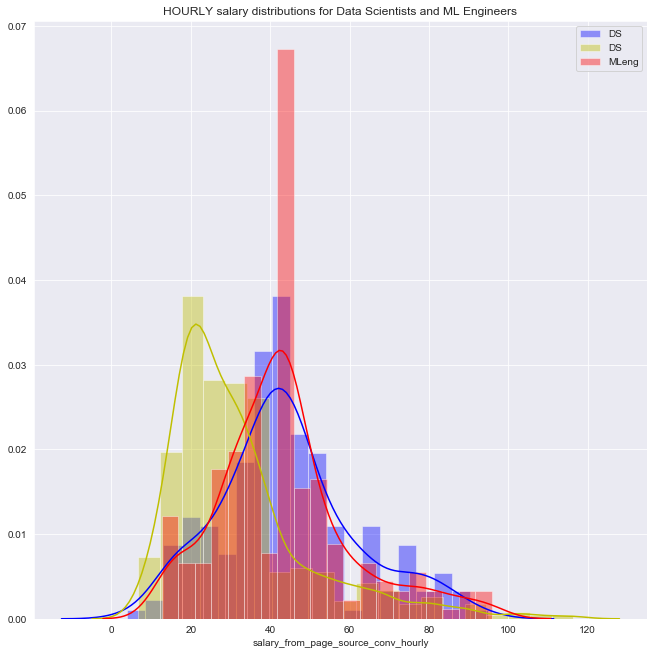

In [30]:
plt.figure(figsize=(11,11))
sns.distplot(df.loc[df['searched__data_scientist']==1].salary_from_page_source_conv_hourly, color='b', label='DS', bins=20)
sns.distplot(df.loc[df['searched__data_analyst']==1].salary_from_page_source_conv_hourly, color='y', label='DS', bins=20)
sns.distplot(df.loc[df['searched__machine_learning_engineer']==1].salary_from_page_source_conv_hourly, color='r', label='MLeng', bins=20)
plt.title('HOURLY salary distributions for Data Scientists and ML Engineers')
plt.legend()
plt.savefig('fig/salary_per_hour.jpeg')
plt.show();

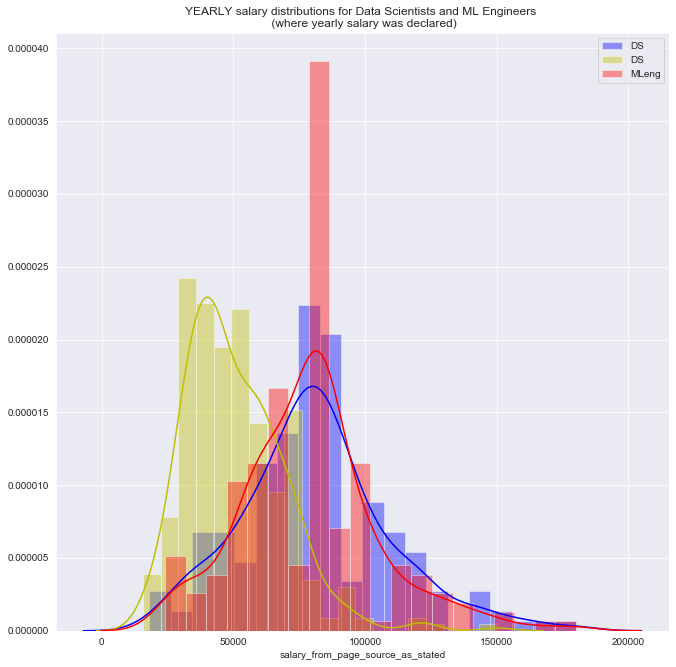

In [33]:
plt.figure(figsize=(11,11))
sns.distplot(df.loc[((df['searched__data_scientist']==1) & (df.salary_from_page_source_time_period=='Y'))].salary_from_page_source_as_stated, color='b', label='DS', bins=20)
sns.distplot(df.loc[((df['searched__data_analyst']==1) & (df.salary_from_page_source_time_period=='Y'))].salary_from_page_source_as_stated, color='y', label='DS', bins=20)
sns.distplot(df.loc[((df['searched__machine_learning_engineer']==1) & (df.salary_from_page_source_time_period=='Y'))].salary_from_page_source_as_stated, color='r', label='MLeng', bins=20)
plt.title('YEARLY salary distributions for Data Scientists and ML Engineers \n (where yearly salary was declared)')
plt.legend()
plt.savefig('fig/yearly_salary_dist.jpeg')
plt.show();

<a id=stat ><a/> 

# 2. Selecting a statistical test
    
[LINK to table of contents](#contents)


<a id=conc ><a/> 

# 3. Summary of findings
    
[LINK to table of contents](#contents)
